# Project Report

# **Using age, cholesterol and heart rate to classify heart disease patients from Cleveland.**
#### Shreya Arora, Youssef Saleh, Zahra Vink.

### Introduction
The term heart (cardiovascular) disease describes a range of heart conditions that arise from problems with the heart and blood vessels. One of these is coronary artery disease, which is when the arteries supplying blood to the heart narrow. Many risk factors can increase the chance of developing this disease, including cholesterol levels and maximum heart rate (Cleveland Clinic, n.d.).

High levels of cholesterol result in fatty deposits in blood vessels that clog them, making it difficult for enough blood to flow through the arteries. When these deposits break suddenly, they form a clot resulting in a heart attack or stroke. If a patient has heart disease, their maximum heart rate could significantly decrease (WebMD, 2002). 

Thus, our question is: **Is a new patient likely to have heart disease, based on cholesterol levels and maximum heart rate achieved?** To answer this, we will use a knn classifier algorithm.

We are using the processed.cleveland.data from the Heart Disease Database (originally collected from the Cleveland Clinic Foundation) to predict if a patient from Cleveland will have heart disease. The columns are as follows:
1. **age**: age
2. **sex**: sex (1 = male, 0 = female)
3. **cp**: chest pain type
4. **trestbps**: resting blood pressure in mmHg
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: fasting blood sugar > 120 mg/dl? (1 = True, 0 = False)
7. **restecg**: resting electrocardiographic results
8. **thalach**: maximum heart rate achieved
9. **exang**: whether exercise induced angina (1 = True, 0 = False)
10. **oldpeak**: ST depression induced by exercise, relative to rest
11. **slope**: the slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
12. **ca**: number of major vessels (0-3) coloured by flourosopy
13. **thal**: (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. **num**: diagnosis of heart disease (1,2,3,4 = presence, 0 = no presence)

Based on the list above, we will be using `chol` and `thalach` as predictors, to classify patients on whether or not they have heart disease.

### Methods

#### Preprocessing and exploratory data analysis

1) Imported libraries and `processed.cleveland.data` dataset from the internet.

2) Cleaned and tidied data to make it usable, by assigning column types and adding a new column, `diag`.

3) Split the data into training and testing sets, working **only** with the training set until the very end.

4) Summarized the training set to make predictions about how we want our classifier to work.

5) Visualized the relationship between `thalac` and `chol` to get a deeper understanding of how the data is distributed.


#### Finding the best $k$ value

Our goal is to find the best value for the $k$-nearest neighbours, providing the highest accuracy in predictions. In the code below, we create a classifier and perform cross-validation to split the training data, train the model with one set and use the other to evaluate it because we can not use testing data. Our next steps are:

1) Use the `recipe` function to center and scale the data.

2) Perform cross-validation with ten folds, using `vfold_cv`, on the training data. We use ten folds because if we only split the data once, the results strongly depend on the observations that end up being in the validation set, so using more folds increases the accuracy.

3) Create a $k$-nearest model with `neighbours = tune()` instead of a value to find the best value of $k$ for $k$-nearest neighbours.

4) Add the recipe and model to a workflow, using `tune_grid` to fit. This worfklow runs cross validation on a range of $k$-nearest neighbours values that is specified in `gridvals`.

5) Find the best $k$ value by filtering for accuracy and plotting a line plot with the accuracy estimate on the y-axis and $k$ (neighbours) on the x-axis.

6) Ensure that the model does not underfit or overfit, and is more accurate than a majority classifier, using our new $k$.

#### Visualizing our results

1) To visualize our results, we plotted max heart rate on the x-axis and cholesterol levels on the y-axis, using diagnosis to colour the points.

2) To check for over/underfitting, we coloured the background of the graph based on what prediction would be made at every possible point. This also allowed us to quickly identify how the model classified patients, and where the boundaries were.

#### Testing our classifier

1) Made a new model specification for the best $k$ value chosen, combined with the recipe made earlier in a workflow, and fit the classifier to our training set.

2) Used `predict` on the testing set to evaluate the classifier's predicition accuracy on data it hadn't seen before.

3) Produced a confusion matrix to get a sense of which diagnoses the classifier was more accurate at giving, and what effects that has on real world application.

4) Tested the accuracy of our classifier when given data from Hungary.

### Preprocessing and exploratory data analysis

#### Importing libraries and formatting graphs

In [2]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

# formatting graphs
options(repr.plot.width = 12, repr.plot.height = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

#### Importing the dataset

We used `read_csv` to import the processed.cleveland.data dataset from the online directory.

In [22]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                          col_names = FALSE)

head(cleveland_data)

nrow(cleveland_data)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


[1] 303

*figure 1*

As you can see above, the dataframe does not come with column names, so those must be added. Some factor columns are also being read as `<dbl>` or `<chr>`, so those need to be changed as well.

The publisher tells us that each column is numeric-valued and there are 303 rows, with missing data represented as the string "?".

#### Cleaning and tidying the data

The reason some columns are being read as `<chr>` is because they include "?" for unknown values, so we will change those to NA so their columns can be assigned the types we need.

We also need to add a true/false column based on **num**, which we will call **diag**, since we are classifying *whether or not* a patient has heart disease. Where **num** classifies by the severity of the disease (with 0 being none), **diag** would allow us to recommend a doctor's visit regardless of the severity, which is more useful in real life since any sort of heart disease requires medical attention and possible treatment.

In [29]:
set.seed(1)
# assigning col names
cleveland_clean <- cleveland_data

colnames(cleveland_clean) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                               "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
                           
# changing "?" into NA
cleveland_clean[ cleveland_clean == "?" ] <- NA

# adding diag column, setting col types
# as.integer is being used to get rid of decimal points when switching to factor
cleveland_clean <- cleveland_clean %>%
                    mutate(diag = as.factor(ifelse(is.na(num), NA, (num > 0)))) %>%
                    mutate(sex = as.factor(as.integer(sex)), cp = as.factor(as.integer(cp)), 
                            fbs = as.factor(as.integer(fbs)), restecg = as.factor(as.integer(restecg)),
                            exang = as.factor(as.integer(exang)), thal = as.factor(as.integer(thal)),
                            ca = as.factor(as.integer(ca)), slope = as.factor(as.integer(slope))) %>%
                     mutate(num = as_factor(num))

head(cleveland_clean)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,FALSE


*figure 2*

Now our data is clean and tidy!

Since `num` uses integers to distinguish presence (1,2,3,4) from absence (0), and we want to determine *whether or not* a patient has heart disease, a new boolean column `diag` has been appended to narrow diagnoses down to TRUE or FALSE. To be able to stratify by it, we made it a factor column.

#### Splitting our data into training and testing sets

Before working on our model, we need to split our data into training and testing sets. Since we want to predict the new column `diag`, we will be stratifying by it.

We will use `initial_split` to split our dataframe into 75% training and 25% testing, since it shuffles our data for us and ensures an constant proportion of each class is present in both. The 75-25 split allows us to train our model on as many data points as possible while also keeping enough data for effective testing later.

In [25]:
#splitting dataframe into training, testing datasets
cleveland_split <- initial_split(cleveland_clean, prop = 3/4, strata = diag)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

head(cleveland_training)

nrow(cleveland_training)
nrow(cleveland_testing)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,TRUE
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,FALSE
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3,TRUE


[1] 228

[1] 75

*figure 3*

In the above code, we split the data into a training set to build our model on, and a testing set to, *well*, test it. Using `initial_split` allowed us to shuffle the data before splitting (removing bias and order) and stratify the data by `diag` so that an equal proportion of each is in each set.

There are 228 rows (75%) in the training set and 75 rows (25%) in the testing set. This gives us enough data to train the classifier on, as well as enough to test it on later. This means our classifier is going to be reliable.

Moving forward, we will only use the training set until the very end.

#### Summarizing the data

Before we get to work, we need to make sure that the two classes actually have different averages in age, serum cholersterol and maximum heart rate achieved.

To do this, we will use `group_by` and `summarize` to create a table with the minimum, maximum and mean of each of our predictors.

In [14]:
#summarizing to get min, max, mean of each predictor + total no. of rows per class
cleveland_summary <- cleveland_training %>%
                    group_by(diag) %>%
                    summarize(mean_chol = mean(chol), 
                              mean_thalach = mean(thalach),
                              n_of_patients = n())

cleveland_summary

`summarise()` ungrouping output (override with `.groups` argument)



diag,mean_chol,mean_thalach,n_of_patients
<fct>,<dbl>,<dbl>,<int>
FALSE,240.9106,158.4065,123
TRUE,255.1333,139.6571,105


*figure 4*

To summarize our data, we grouped by `diag` then summarized for the minimum, maximum and mean of `chol` and `thalach`.

We can see that patients with heart disease tend to have higher cholesterol and lower maximum heart rates. Therefore, these trends are what we expect our classifier to predict diagnoses using later. We can also see that the number of TRUE and FALSE diagnoses are roughly balanced in the training set, which means our classifier is unlikely to be biased.

#### Visualizing the realtionship between predictors and class

To visualize the relationship that cholesterol and maximum heart rate achieved have with a patient's diagnosis, we will use `ggplot` to generate a scatter plot of `chol` vs `thalach`, colouring for `diag` 

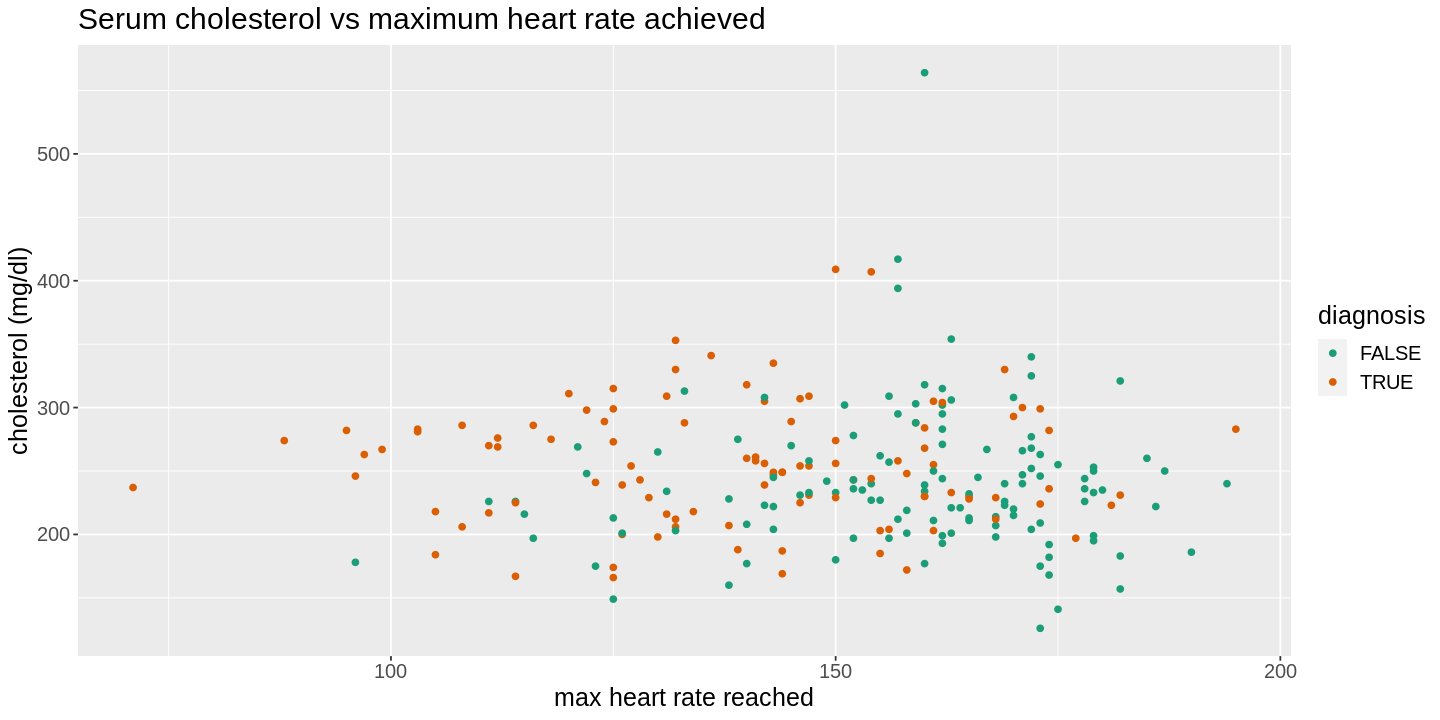

In [15]:
#plotting the training data
chol_thalach <- ggplot(cleveland_training, aes(x = thalach, y = chol, color = diag)) +
                 geom_point() +
                 labs(x = "max heart rate reached", y = "cholesterol (mg/dl)",
                      color = "diagnosis", title = "Serum cholesterol vs maximum heart rate achieved") +
                 scale_color_brewer(palette = "Dark2") +
                 theme(text = element_text(size = 15))


chol_thalach

*figure 5*

This graph shows that patients with heart disease (orange) tend to have lower maximum heart rates and higher cholesterol, with patients without heart disease (teal) having higher maximum heart rates and a wider range of cholesterol levels.

Seeing it in this form allows us to not only verify what the earlier summary showed us, but also be able to see how outlier affected the values it showed. It also shows us how spread out the classes are. 

### Finding the best $k$ value

#### Creating the model

To create our model, we need to follow four steps:

1. create a recipe that uses `cleveland_training` to predict `diag`, with `chol` and `thalach` as predictors.
2. create a specification that uses k-nearest neighbors, with `neighbors = tune()` to perform cross-validation.
3. split the data into 10 equally sized chunks, known as folds, stratifying by `diag`.
4. create a workflow combining the first 2 steps, with `tune_grid` instead of `fit`.
5. repeat for each validation set for values of 1 ≤ $k$ ≤ 100

To get the same folds each time, we need to set the seed to 1.

In [16]:
set.seed(1)

# Performing Standardization 
cleveland_recipe <- recipe(diag ~ chol + thalach , data = cleveland_training) %>%
   step_scale(all_predictors()) %>%
   step_center(all_predictors())

# K-nearest neighbour model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

# Perform 10 fold-cross valdiation
cleveland_vfold <- vfold_cv(cleveland_training, v = 10, strata = diag)

gridvals <- tibble(neighbors = c(1:100))

# Create workflow
knn_results <- workflow() %>%
      add_recipe(cleveland_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = cleveland_vfold, grid = gridvals) %>%
# Collect metrics, filter for accuracy
      collect_metrics() %>%
      filter(.metric == "accuracy") %>%
      select(neighbors, mean) %>%
      arrange(desc(mean))

head(knn_results)

neighbors,mean
<int>,<dbl>
73,0.7120224
74,0.7120224
71,0.7031291
72,0.6987813
75,0.6987648
76,0.6987648


*figure 6*

Both $k$ = 73 and $k$ = 74 give us 71.2% accuracy!
To pick one, we should plot a line graph of accuracy vs $k$.

#### Visualizing accuracy

Using `geom_line`, we will be able to view how "safe" each choice is, that is how big of a difference in accuracy a difference of $k$ ± 1 would cause. To do this, we need to plot a graph of accuracy vs neighbors.

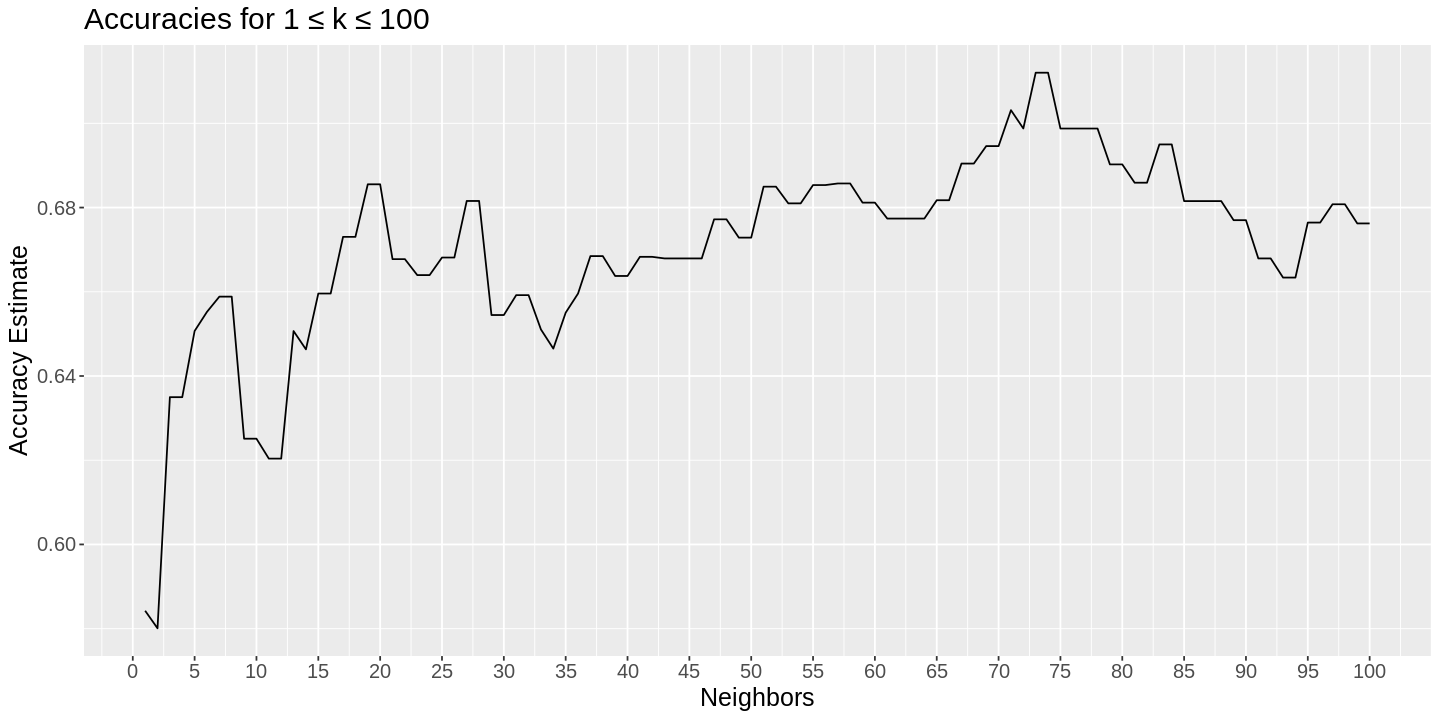

In [17]:
accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
      #geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracies for 1 ≤ k ≤ 100") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) + # adjusting the x-axis
      theme(text = element_text(size = 15))

accuracy_versus_k

*figure 7*

Looking at the graph above, both give us pretty "safest" values of $k$, because the drops to either side of both points are the same. We will therefore pick $k$ = 73, because it would be easier and quicker to process.

#### Comparing to a majority classifier

We still, however, need to compare this accuracy to a majority classifier.

To do this, we will `group_by` diagnosis and `summarize` to get the percentage of the most abundant class.

In [18]:
#Comparing accuracy of classifier with majority classifier
cleveland_proportions <- cleveland_training %>%
    group_by(diag) %>%
    summarize(n=n()) %>%
    mutate(percent = 100*n/nrow(cleveland_training))
cleveland_proportions

`summarise()` ungrouping output (override with `.groups` argument)



diag,n,percent
<fct>,<int>,<dbl>
FALSE,123,53.94737
TRUE,105,46.05263


*figure 8*

We can deduce that a FALSE diagnosis represents the majority of the training data with 53.9% of all results. Therefore, our classifier is more accurate than a majority classifier.

#### Building the final model

Now that we have a value for $k$, we can create our final spec using `neighbors = 73`. We then fit it to `cleveland_training`.

In [19]:
set.seed(1)

final_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 73)%>%
    set_engine("kknn")%>%
    set_mode("classification")

fit <- workflow()%>%
    add_recipe(cleveland_recipe)%>%
    add_model(final_spec)%>%
    fit(data = cleveland_training)

fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~73, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3245614
Best kernel: rectangular
Best k: 73

Great, we have a working model now!

#### Checking for over/underfitting

We still need to check whether out model over/underfits, so we will visualize the regions that the model has assigned to each class. If it does, that means it wouldn't be reliable when using new data to predict.

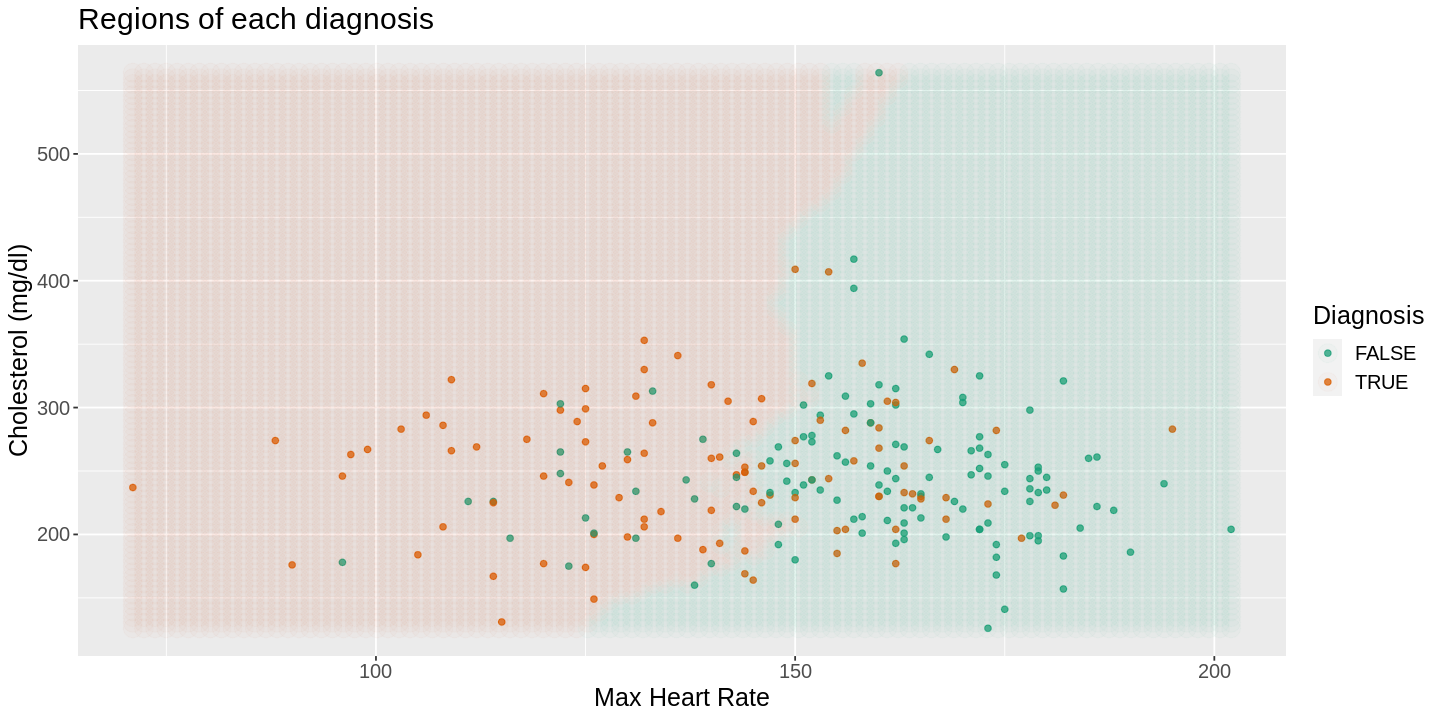

In [60]:
set.seed(1)

#make the model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 73) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#combine the model and recipe in a workflow, retrain the classifier with fit
fit <- workflow() %>%
    add_recipe(cleveland_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = cleveland_training)

#graph with coloured background to check for overfitting/underfitting

thalach_grid <- seq(min(cleveland_clean$thalach), 
                max(cleveland_clean$thalach), 
                length.out = 100)

chol_grid <- seq(min(cleveland_clean$chol), 
                max(cleveland_clean$chol), 
                length.out = 100)

asgrid <- as_tibble(expand.grid(thalach = thalach_grid, 
                                chol = chol_grid))

knnPredGrid <- predict(fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) %>%
                    rename(diag = .pred_class)


plot_results <- ggplot() + 
                geom_point(data = cleveland_training, 
                mapping = aes(x = thalach, y = chol, color = diag), 
                alpha = 0.75) +
                geom_point(data = prediction_table, 
                           mapping = aes(x = thalach, 
                           y = chol, 
                           color = diag), 
                           alpha = 0.02, 
                           size = 5) +
                labs(x = "Max Heart Rate", y = "Cholesterol (mg/dl)", 
                     color = "Diagnosis", 
                     title = "Regions of each diagnosis") +
                scale_color_brewer(palette = "Dark2") +
                theme(text = element_text(size = 15))

plot_results

*figure 9*

Looking at the graph above the classifer is neither underfitting or overfitting and therefore we can trust that our classifier will be able to predict new data. 

### Testing our classifier

#### Accuracy and confusion matrix

Now, we will finally use the testing set to look at how our classifier performs when given data it has never seen before.

To do this, we will predict using the same `fit` as before, but this time with `cleveland_testing`. We need to look at its accuracy using `metrics` and its confusion matrix using `conf_mat`.

In [21]:
set.seed(1)

#predict
predictions <- predict(fit, cleveland_testing) %>%
               bind_cols(cleveland_testing)

#find the accuracy of the predictions
metrics<- predictions %>%
    metrics(truth = diag, estimate = .pred_class) %>%
    filter(.metric == "accuracy") 

metrics

#confusion matrix, identifies the areas the model is weak at classifying
conf_mat<- predictions %>%
    conf_mat(truth = diag, estimate = .pred_class)
conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6533333


          Truth
Prediction FALSE TRUE
     FALSE    31   16
     TRUE     10   18

*figure 10*

Our classifier was 68% accurate and labeled 49 out of 75 observations correctly.

It also seems to be more likely to overdiagnose (16) than under diagnose (10). This is not a terrible error if the classifier is intended to be used before rather than instead of going to a doctor. Medically speaking, it is better to err on the side of caution when it comes to predicting diagnoses.

Therefore, we can see that our use of the new column `diag` instead of `num` increases the caution of our classifier and its users in the medical field, because the severity of the disease should rely on an in-person diagnosis. By aggreggating all potential heart disease diagnoses into one class (TRUE), we decrease chances of further misdiagnosis within the subset of patients that do have heart disease.

It also decreases the potential for medical practitioners diagnosing patients with a certain bias to a level of heart disease, which is a very real issue within the medical field.

#### Testing the versatility of our classifier

To test our classifier's accuracy when given data from another source, we will use another dataset from the publisher. This time we will use the processed.hungary.data dataset as a secondary testing set.

This allows us to see how compatible our classifier is with different medical systems in different countries and tells us if it can be used overseas (i.e. how versatile and useful it is)

In [90]:
hungary_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data",
                            col_names = FALSE)

hungary_clean <- hungary_data

colnames(hungary_clean) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                               "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
                           
# changing "?" into NA
hungary_clean[ hungary_clean == "?" ] <- NA

# adding diag column, setting col types
# as.integer is being used to get rid of decimal points when switching to factor
hungary_clean <- hungary_clean %>%
                    mutate(diag = as.factor(ifelse(is.na(num), NA, (num > 0)))) %>%
                    mutate(thalach = as.double(thalach), chol = as.double(chol)) %>%
                    filter(chol != "NA",
                          thalach != "NA")

head(hungary_clean)
nrow(hungary_clean)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_double(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<fct>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0,FALSE
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0,FALSE
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0,FALSE
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0,FALSE
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0,FALSE
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0,FALSE


[1] 270

*figure 11*

We cleaned the new dataset in the same manner as the first one, changing '?' to NA, assigning `thalach` and `chol` their proper column types, and adding the `diag` column.

We then filtered out any rows with `thalach` or `chol` equal to NA, so that our fit would work. This is already one limitation that we have run into.

This dataset is smaller than the previous one, at only only 294 rows, and with *a lot* of NAs, but that is fine since we aren't using it to train.

#### Testing our classifier on the Hungary dataset

To assess the versatility of our classifier on the Hungary dataset, we use `predict` to look at how accurate it is when given the new data.

In [92]:
hungary_predictions <- predict(fit, hungary_clean) %>%
                      bind_cols(hungary_clean)

#find the accuracy of the predictions
metrics<- hungary_predictions %>%
    metrics(truth = diag, estimate = .pred_class) %>%
    filter(.metric == "accuracy") 

metrics

#confusion matrix, identifies the areas the model is weak at classifying
conf_mat<- hungary_predictions %>%
    conf_mat(truth = diag, estimate = .pred_class)
conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5851852


          Truth
Prediction FALSE TRUE
     FALSE    85   28
     TRUE     84   73

*figure 12*

As we can see above, the accuracy of the classifier when given Hungarian data is very low (58.5%). Therefore we can conclude that our model is highly dependent on the training data it receives and is not versatile. We do not recommend that our classifier be used on patients outside of Cleveland.

### Discussion
#### Answering the predictive question

The question that we were trying to answer by using our classifier was this: “Is a new patient likely to have heart disease, based on cholesterol levels and maximum heart rate achieved?”
To answer this question, we made a classifier that diagnosed heart diseased using cholesterol levels and maximum heart rate achieved.

#### Expected findings vs outcome

We are expecting a high accuracy for our classifier, roughly above 60%. This was deduced considering that the visualizations between the predictors and target variables depicted clustering of the data points for each diagnosis (TRUE/FALSE), indicating a relatively strong causal relationship with the target variable. We also aimed for a high accuracy due to the context of the problem, where a misdiagnosis could potentially cost someone their life.

In our proposal, we also expected that a patient prone to heart disease will tend to have higher levels of cholesterol and higher maximum heart rates. As mentioned in the introduction both high cholesterol and high blood pressure is likely due to the patients having clogged arteries and therefore restricted blood flow/blood being pumped which greatly increases the risk of having heart disease.

Our classifier’s accuracy was around 70%, in accordance with our prediction. The mistakes it made can be attributed to the dataset not being large enough, and therefore there was less data in the training set to train the classifier, and less data in the testing set to assess the classifier's accuracy for each K value.  Our visualizations showed that our classifier diagnosed patients with heart disease who tended to have higher levels of cholesterol and higher maximum heart rates.

Our findings are as expected: a patient prone to heart disease tends to have higher levels of cholesterol and higher maximum heart rates. As mentioned in the introduction both high cholesterol and high blood pressure is likely due to the patients having clogged arteries and therefore restricted blood flow/blood being pumped which greatly increases the risk of having heart disease.

We have found that our classifier is only really effective within Cleveland. This means that for real world application, additional classifiers would have to be created for each geographic area or demographic that the hospital handles.

#### Impact of these findings

Being able to have a classification system for heart disease could make it easier and more accurate for doctors to diagnose patients, resulting in earlier treatment. It could also save doctors time since they already have a clue as to what the diagnosis could be. Therefore, they could spend less time with patients who have a false diagnosis and more with those that have a true one, maximizing the efficiency of the medical system. Having a high level of accuracy in diagnosis is important because a false diagnosis could be fatal. Although the accuracy of the classifier is fairly high, we recommend that it is used as a preliminary prediction prior to visiting a professional, who then can confirm the diagnosis, since it is not perfectly accurate.

#### What future questions could this lead to?

- What is the average cholesterol level of a average middle aged person?
- What other factors other than cholesterol and heart rate impact the chance of a person getting heart disease?
- What is the mean level of blood pressure in a patient with heart disease?
- How can we make this classifier more versatile? (i.e. usable in more places)

### Bibliography

Detecting and Treating Heart Failure. (2002, November 1). WebMD. https://www.webmd.com/heart-disease/heart-failure/understanding-heart-failure-treatment.

Preventing & reversing cardiovascular disease. Cleveland Clinic. (n.d.). Retrieved November 6, 2021, from https://my.clevelandclinic.org/health/articles/17385-cardiovascular-disease-prevention--reversal. 

Rodgers, J. L., Jones, J., Bolleddu, S. I., Vanthenapalli, S., Rodgers, L. E., Shah, K., Karia, K., & Panguluri, S. K. (2019, April 27). Cardiovascular risks associated with gender and aging. Journal of cardiovascular development and disease. Retrieved November 10, 2021, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6616540/.

The creators of the Heart Disease Database are:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.